# Análise Exploratória de dados

Feito po Leandro Felipe de Assis

linkedin: https://www.linkedin.com/in/leandrofassis/

Github: https://github.com/leandrofassis

# 1 Sobre os Dados:
Levantamento de Pessoas e Famílias em situações de Pobreza, Extrema Pobreza, Vulnerabilidade no Brasil usando como fonte dados do Cadastro Único e Auxilio Brasil.








## 1.2 Índice de pobreza no Brasil
No Brasil, o índice de pobreza é delimitado pelo IBGE, com base em indicadores oferecidos pelo Banco Mundial.



*   **Extrema pobreza**: quando uma pessoa possui uma renda inferior a US 1,
90𝑝𝑜𝑟𝑑𝑖𝑎.𝐸𝑠𝑠𝑒𝑣𝑎𝑙𝑜𝑟,𝑛𝑜𝑐â𝑚𝑏𝑖𝑜𝑎𝑡𝑢𝑎𝑙,é𝑝𝑟ó𝑥𝑖𝑚𝑜𝑑𝑒𝑅
  168,00 por mês.
*  **Pobreza:** quando uma pessoa possui renda diária inferior a US 5,50𝑝𝑜𝑟𝑑𝑖𝑎,𝑜𝑢𝑠𝑒𝑗𝑎,𝑎𝑝𝑟𝑜𝑥𝑖𝑚𝑎𝑑𝑎𝑚𝑒𝑛𝑡𝑒𝑈𝑆
  486,00 por mês em valores atualizados.


*   **Vulnerabilidade**: São pessoas tanto em situação de pobreza quanto de extrema pobreza


# 2 Pacotes e Bibliotecas

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import PercentFormatter

# 3 Exploração de dados

## wrangling da estrutura

o wrangling é o processo de preparar os dados para análise. Isso envolve a limpeza, padronização e transformação dos dados de forma que estejam em um formato adequado para análise.

In [5]:
df = pd.read_csv("/content/indices_pobreza_consolidado_anual.csv")

### Qantidades de linas e colunas

In [6]:
df.shape

(11, 21)

### Tipos de dados de cada *coluna*

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   referencia                   11 non-null     int64  
 1   periodo                      11 non-null     int64  
 2   pobreza                      11 non-null     int64  
 3   extrema_pobreza              11 non-null     int64  
 4   total                        11 non-null     int64  
 5   populacao_estimada           11 non-null     int64  
 6   porcentagem_pobreza          11 non-null     float64
 7   porcentagem_extrema_pobreza  11 non-null     float64
 8   porcentagem_vulnerabilidade  11 non-null     float64
 9   familias_pobreza             11 non-null     int64  
 10  familias_extrema_pobreza     11 non-null     int64  
 11  familias_vulnerabilidade     11 non-null     int64  
 12  indigenas_pobreza            11 non-null     int64  
 13  indigenas_extrema_pobr

### Nome de cada uma das colunas

In [8]:
df.columns

Index(['referencia', 'periodo', 'pobreza', 'extrema_pobreza', 'total',
       'populacao_estimada', 'porcentagem_pobreza',
       'porcentagem_extrema_pobreza', 'porcentagem_vulnerabilidade',
       'familias_pobreza', 'familias_extrema_pobreza',
       'familias_vulnerabilidade', 'indigenas_pobreza',
       'indigenas_extrema_pobreza', 'indigenas_vulnerabilidade',
       'quilombolas_pobreza', 'quilombolas_extrema_pobreza',
       'quilombolas_vulnerabilidade', 'ciganos_pobreza',
       'ciganos_extrema_pobreza', 'ciganos_vulnerabilidade'],
      dtype='object')

### Amostra do DataFrame original

In [9]:
# as 5 primeiras linhas
df.head()

,referencia,periodo,pobreza,extrema_pobreza,total,populacao_estimada,porcentagem_pobreza,porcentagem_extrema_pobreza,porcentagem_vulnerabilidade,familias_pobreza,...,familias_vulnerabilidade,indigenas_pobreza,indigenas_extrema_pobreza,indigenas_vulnerabilidade,quilombolas_pobreza,quilombolas_extrema_pobreza,quilombolas_vulnerabilidade,ciganos_pobreza,ciganos_extrema_pobreza,ciganos_vulnerabilidade
0,2012,201212,19392882,44684759,64077641,193976530,0.10,0.23,0.33,5311337,...,18472436,14209,87820,102029,8314,60250,68564,143,978,1121
1,2013,201312,19268775,43914616,63183391,201062789,0.10,0.22,0.31,5397222,...,18752056,15781,95602,111383,10718,77092,87810,305,1702,2007
2,2014,201412,18491146,45300249,63791395,202799518,0.09,0.22,0.31,5325302,...,19420635,16711,105747,122458,11986,94670,106656,405,2499,2904
3,2015,201512,14652534,38919660,53572194,204482867,0.07,0.19,0.26,4268713,...,16603991,15970,104672,120642,12770,100889,113659,540,3099,3639
4,2016,201612,12974976,36803455,49778431,206114067,0.06,0.18,0.24,3849178,...,15569480,15723,106059,121782,12370,109495,121865,591,3524,4115


In [10]:
# as 5 ultimas linhas
df.tail()

,referencia,periodo,pobreza,extrema_pobreza,total,populacao_estimada,porcentagem_pobreza,porcentagem_extrema_pobreza,porcentagem_vulnerabilidade,familias_pobreza,...,familias_vulnerabilidade,indigenas_pobreza,indigenas_extrema_pobreza,indigenas_vulnerabilidade,quilombolas_pobreza,quilombolas_extrema_pobreza,quilombolas_vulnerabilidade,ciganos_pobreza,ciganos_extrema_pobreza,ciganos_vulnerabilidade
6,2018,201812,9679720,37766288,47446008,208494900,0.05,0.18,0.23,3006575,...,15757243,13447,114609,128056,10294,122978,133272,708,4915,5623
7,2019,201912,8977608,39090704,48068312,210147125,0.04,0.19,0.23,2853527,...,16374115,12817,120586,133403,9891,130428,140319,626,5426,6052
8,2020,202012,8482827,39596469,48079296,211755692,0.04,0.19,0.23,2764930,...,16688590,12191,123824,136015,10054,135019,145073,612,5923,6535
9,2021,202112,8901321,42662245,51563566,213317639,0.04,0.20,0.24,3124874,...,18818144,13117,137462,150579,11665,157444,169109,723,6549,7272
10,2022,202209,9509943,49055941,58565884,213317639,0.04,0.23,0.27,3495077,...,23934236,15604,170009,185613,12526,195070,207596,827,8534,9361


### Retirando a coluna periodo, que não tera utilidade

In [11]:
df = df.drop('periodo', axis=1)

In [12]:
df.head(11)

,referencia,pobreza,extrema_pobreza,total,populacao_estimada,porcentagem_pobreza,porcentagem_extrema_pobreza,porcentagem_vulnerabilidade,familias_pobreza,familias_extrema_pobreza,familias_vulnerabilidade,indigenas_pobreza,indigenas_extrema_pobreza,indigenas_vulnerabilidade,quilombolas_pobreza,quilombolas_extrema_pobreza,quilombolas_vulnerabilidade,ciganos_pobreza,ciganos_extrema_pobreza,ciganos_vulnerabilidade
0,2012,19392882,44684759,64077641,193976530,0.10,0.23,0.33,5311337,13161099,18472436,14209,87820,102029,8314,60250,68564,143,978,1121
1,2013,19268775,43914616,63183391,201062789,0.10,0.22,0.31,5397222,13354834,18752056,15781,95602,111383,10718,77092,87810,305,1702,2007
2,2014,18491146,45300249,63791395,202799518,0.09,0.22,0.31,5325302,14095333,19420635,16711,105747,122458,11986,94670,106656,405,2499,2904
3,2015,14652534,38919660,53572194,204482867,0.07,0.19,0.26,4268713,12335278,16603991,15970,104672,120642,12770,100889,113659,540,3099,3639
4,2016,12974976,36803455,49778431,206114067,0.06,0.18,0.24,3849178,11720302,15569480,15723,106059,121782,12370,109495,121865,591,3524,4115
5,2017,11481091,38469544,49950635,207660929,0.06,0.19,0.24,3460232,12547592,16007824,13977,112888,126865,10691,118041,128732,651,4334,4985
6,2018,9679720,37766288,47446008,208494900,0.05,0.18,0.23,3006575,12750668,15757243,13447,114609,128056,10294,122978,133272,708,4915,5623
7,2019,8977608,39090704,48068312,210147125,0.04,0.19,0.23,2853527,13520588,16374115,12817,120586,133403,9891,130428,140319,626,5426,6052
8,2020,8482827,39596469,48079296,211755692,0.04,0.19,0.23,2764930,13923660,16688590,12191,123824,136015,10054,135019,145073,612,5923,6535
9,2021,8901321,42662245,51563566,213317639,0.04,0.20,0.24,3124874,15693270,18818144,13117,137462,150579,11665,157444,169109,723,6549,7272


In [13]:
populacao = df.loc[:, 'populacao_estimada']
referencia = df.loc[:, 'referencia']
pobreza = df.loc[:,'pobreza']
extrema_pobreza = df.loc[:,'extrema_pobreza']
populacao_total = (populacao - (pobreza + extrema_pobreza))
porcentagem_pobreza = df.loc[:,'porcentagem_pobreza']
porcentagem_extrema_pobreza = df.loc[:,'porcentagem_extrema_pobreza']
familias_pobreza = df.loc[:,'familias_pobreza']
familias_extrema_pobreza = df.loc[:,'familias_extrema_pobreza']


# 4 Analisando as informações

## Analisando os dados de pobreza e pobreza extrema

### Graficos

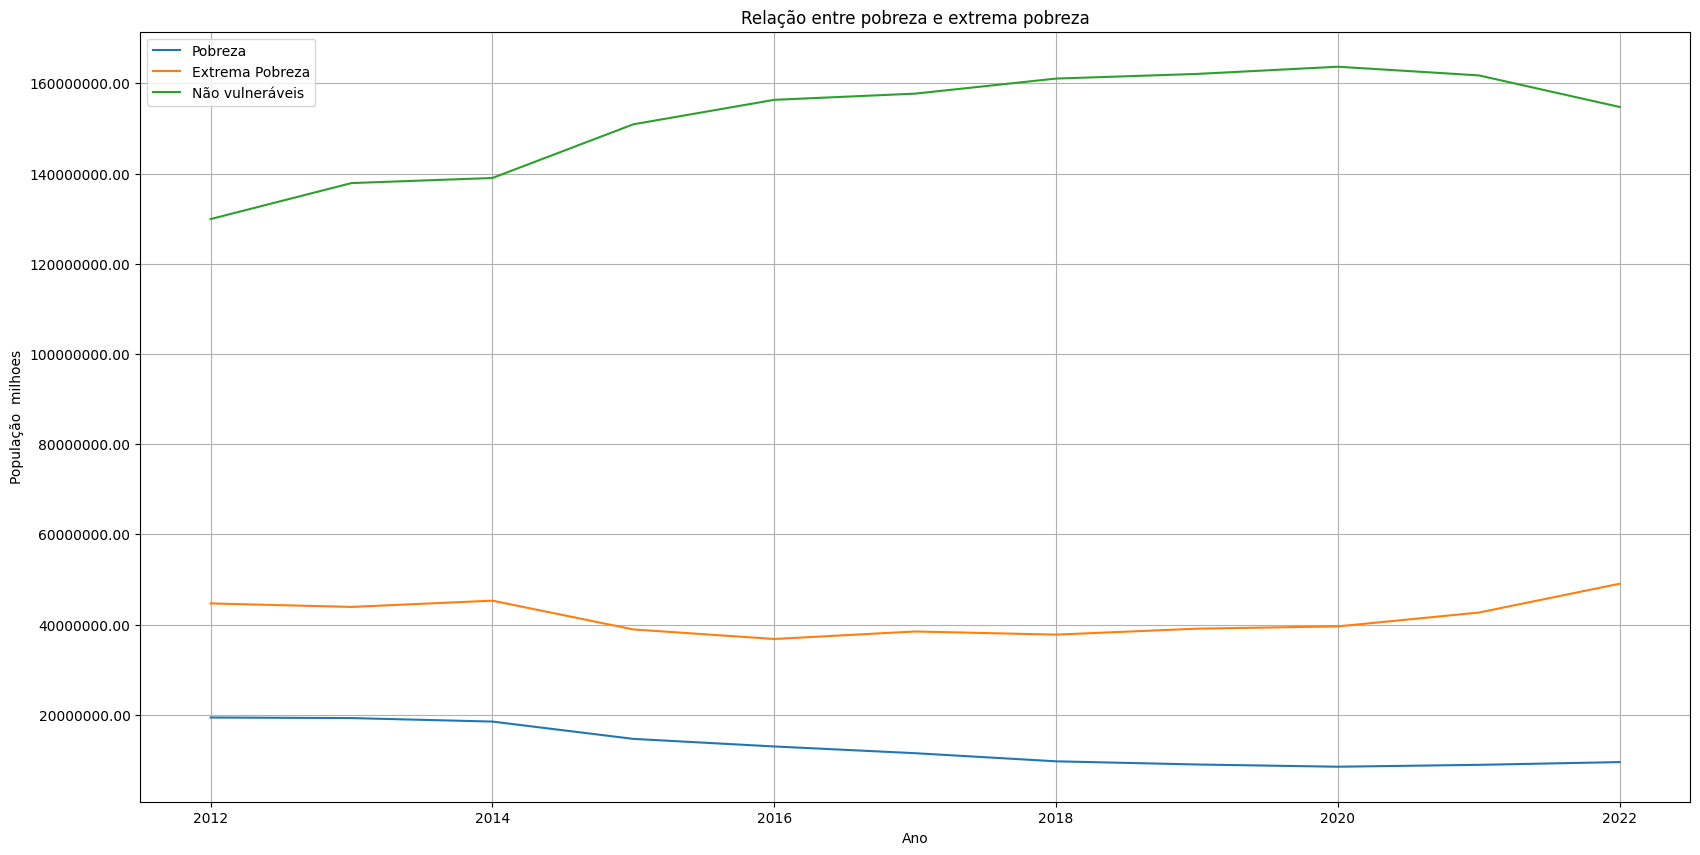

In [14]:
# Criar o gráfico de linha
# Definir o tamanho da figura
plt.figure(figsize=(20, 10))  # Largura x Altura
sns.lineplot(x=referencia, y=pobreza, label = 'Pobreza')
plt.xlabel('Ano')
# Adicionar uma segunda linha usando o matplotlib
plt.plot(referencia, extrema_pobreza, label='Extrema Pobreza')
#adicionar uma terceira linha
plt.plot(referencia, populacao_total, label='Não vulneráveis')
plt.ylabel('População  milhoes')

plt.grid(True)

# Mostrar a legenda
plt.legend()
plt.title('Relação entre pobreza e extrema pobreza')

# Ajustar o formato dos valores no eixo Y
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# Salvar o gráfico como um arquivo PNG (ou outro formato desejado)
plt.savefig('pobreza.png')

# Mostrar o gráfico
plt.show()

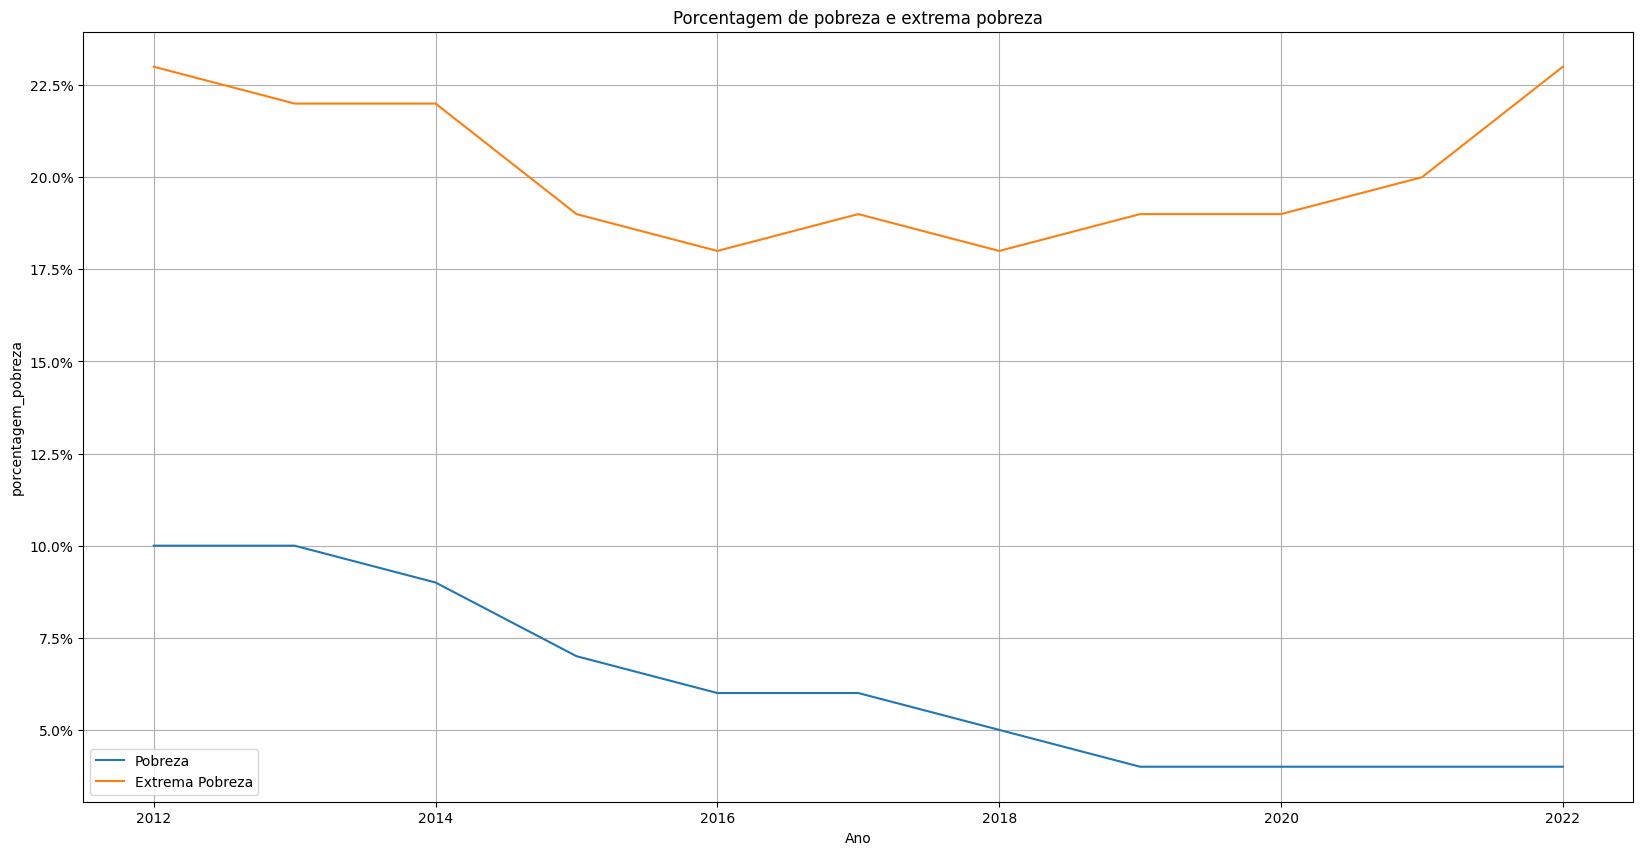

In [15]:
# Criar o gráfico de linha com Seaborn
# Definir o tamanho da figura
plt.figure(figsize=(20, 10))  # Largura x Altura
sns.lineplot(x=referencia, y=porcentagem_pobreza, label = 'Pobreza')
plt.xlabel('Ano')
# Adicionar uma segunda linha usando o matplotlib
plt.plot(referencia, porcentagem_extrema_pobreza, label='Extrema Pobreza')

#acrescentar grid ao grafico
plt.grid(True)

# Mostrar a legenda
plt.legend()
plt.title('Porcentagem de pobreza e extrema pobreza')
# Ajustar o formato para porcentagem no eixo Y
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
# Salvar o gráfico como um arquivo PNG (ou outro formato desejado)
plt.savefig('pobreza_porcentagem.png')

# Mostrar o gráfico
plt.show()

### Insights dos Graficos acima:

Os graficos acima mostram as mesmas informações, a diferênça é que o primeiro mostra o numero de pessoas em situação vulnerável (pessoas em situação de pobreza e extrema pobreza) no brasil. Enquanto o segundo grafico mostra a porcentagem em relação a população total do país.

O que mais chama a atenção nesse graficos é a quantidade de pessoas em situação de extrema pobreza no Brasil. Embora no periodo entre 2012 a 2016 a quantidade ter diminuido, em 2022 ultrapassou os 22% da população o que equivale a incriveis 50.000.000 (cinquenta milhôes de pessoas).

E as pessoas em situação de pobreza equivale a metade das pessoas em extrema pobreza, isso significa que existem mais pessoas em extrema pobreza do que em situação de pobreza. Vale lembrar que A pobreza extrema é definida por um nível de renda muito mais baixo do que a pobreza.


 Banco Mundial define a extrema pobreza como uma renda diária inferior a US 1,90 por dia. No Brasil, O IBGE define a extrema pobreza como uma renda familiar per capita mensal inferiora R$168,00

**Impactos**: A pobreza extrema tem impactos mais significativos na vida das pessoas do que a pobreza. As pessoas em extrema pobreza estão mais propensas a sofrer de fome, desnutrição, doenças, mortalidade infantil, analfabetismo e exclusão social.

## Analisando os dados de familias em pobreza e familias em extrema pobreza

### Grafico

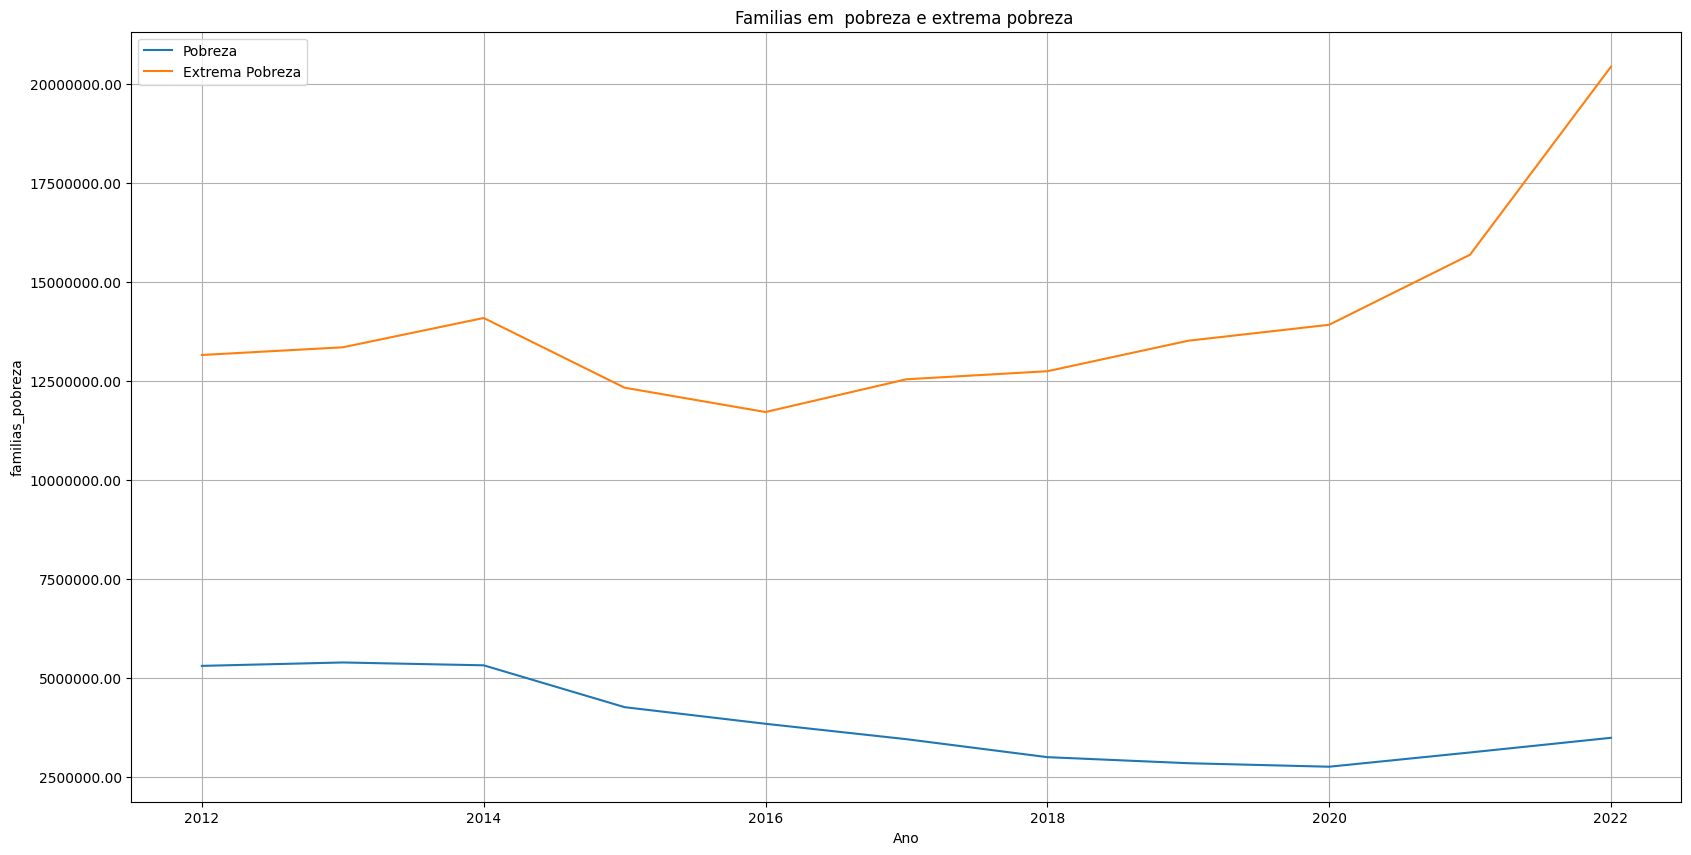

In [16]:
# Criar o gráfico de linha com Seaborn
# Definir o tamanho da figura
plt.figure(figsize=(20, 10))  # Largura x Altura

#tipo de grafico lineplot
sns.lineplot(x=referencia, y=familias_pobreza, label = 'Pobreza')
plt.xlabel('Ano')
# Adicionar uma segunda linha usando o matplotlib
plt.plot(referencia, familias_extrema_pobreza, label='Extrema Pobreza')

#acrescentar grid ao grafico
plt.grid(True)

# Mostrar a legenda
plt.legend()

#Titulo go grafico
plt.title('Familias em  pobreza e extrema pobreza ')

# Ajustar o formato dos valores no eixo Y
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Salvar o gráfico como um arquivo PNG (ou outro formato desejado)
plt.savefig('familias_pobreza.png')

# Mostrar o gráfico
plt.show()

In [17]:
df.describe()

,referencia,pobreza,extrema_pobreza,total,populacao_estimada,porcentagem_pobreza,porcentagem_extrema_pobreza,porcentagem_vulnerabilidade,familias_pobreza,familias_extrema_pobreza,familias_vulnerabilidade,indigenas_pobreza,indigenas_extrema_pobreza,indigenas_vulnerabilidade,quilombolas_pobreza,quilombolas_extrema_pobreza,quilombolas_vulnerabilidade,ciganos_pobreza,ciganos_extrema_pobreza,ciganos_vulnerabilidade
count,11.000000,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,11.000000,11.000000,11.000000,1.100000e+01,1.100000e+01,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,2017.000000,1.289207e+07,4.147854e+07,5.437061e+07,2.066482e+08,0.062727,0.201818,0.262727,3.896088e+06,1.395834e+07,1.785443e+07,14504.272727,116298.000000,130802.272727,11025.363636,118306.909091,129332.272727,557.363636,4316.636364,4874.000000
std,3.316625,4.379704e+06,3.874546e+06,6.742655e+06,5.859028e+06,0.024121,0.019400,0.037173,1.026804e+06,2.394039e+06,2.442882e+06,1514.873070,22389.596593,22162.012386,1369.622377,37257.749303,37847.412826,199.831565,2243.581167,2426.734514
min,2012.000000,8.482827e+06,3.680346e+07,4.744601e+07,1.939765e+08,0.040000,0.180000,0.230000,2.764930e+06,1.172030e+07,1.556948e+07,12191.000000,87820.000000,102029.000000,8314.000000,60250.000000,68564.000000,143.000000,978.000000,1121.000000
25%,2014.500000,9.243776e+06,3.869460e+07,4.892886e+07,2.036412e+08,0.040000,0.190000,0.235000,3.065724e+06,1.264913e+07,1.619097e+07,13282.000000,105209.500000,121212.000000,10174.000000,97779.500000,110157.500000,472.500000,2799.000000,3271.500000
50%,2017.000000,1.148109e+07,3.959647e+07,5.156357e+07,2.076609e+08,0.060000,0.190000,0.240000,3.495077e+06,1.335483e+07,1.668859e+07,14209.000000,112888.000000,126865.000000,10718.000000,118041.000000,128732.000000,612.000000,4334.000000,4985.000000
75%,2019.500000,1.657184e+07,4.429969e+07,6.087464e+07,2.109514e+08,0.080000,0.220000,0.290000,4.790025e+06,1.400950e+07,1.878510e+07,15752.000000,122205.000000,134709.000000,12178.000000,132723.500000,142696.000000,679.500000,5674.500000,6293.500000
max,2022.000000,1.939288e+07,4.905594e+07,6.407764e+07,2.133176e+08,0.100000,0.230000,0.330000,5.397222e+06,2.043916e+07,2.393424e+07,16711.000000,170009.000000,185613.000000,12770.000000,195070.000000,207596.000000,827.000000,8534.000000,9361.000000


### Insights do Grafico:

Esse grafico diferente dos anteriores mostra a relação das familias pobres e familias em extrema pobreza. O numero de familias em extrema pobreza só aumentou de 2012 até 2022. Apesar do número de familias na pobreza tenha diminuido aproximadamente pela metade nesse periodo. As familias em extrema pobreza ultrapassa as 20.000.000 (vinte milhôes).

# 5 Finalização

Eu não quero apontar culpados e nem falar o que devia ou nao ser feito, apenas atentar para a realidade que realmente é assustadora. No DataFrame tem outras informações a respeito de situações de pobreza e extrema pobreza, sobre Indigenas, Quilombolas e até Ciganos. Mais em todas os casos o numero de pessoas em situação de pobreza extrema excede o numero de pessoas em situação de pobreza.